In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv("squid_game.csv")
print(data.head())

                    user_name  user_location  \
0   the _ûndër-ratèd niggáh👊🏾            NaN   
1  Best uncle on planet earth            NaN   
2                      marcie            NaN   
3                    YoMo.Mdp  Any pronouns    
4             Laura Reactions         France   

                                    user_description  \
0  @ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...   
1                                                NaN   
2  animal crossing. chicken nuggets. baby yoda. s...   
3  Where the heck is the karma\nI'm going on my s...   
4  I talk and I make reactions videos about shows...   

                user_created  user_followers  user_friends  user_favourites  \
0  2019-09-06 19:24:57+00:00             581          1035             8922   
1  2013-05-08 19:35:26+00:00             741           730             8432   
2  2009-02-21 10:31:30+00:00             562          1197            62732   
3  2021-02-14 13:21:22+00:00               3           277

In [3]:
data = data.drop(columns="user_location", axis=1)

In [4]:
print(data.isnull().sum())

user_name              4
user_description    5211
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
source                 0
is_retweet             0
dtype: int64


In [5]:
data = data.dropna()

In [6]:
#importing packages for cleaning the data
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#cleaning the data
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+www\.\S+', '', text)
    text = re.sub('[%s]'%re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data["text"] = data["text"].apply(clean)
    
    

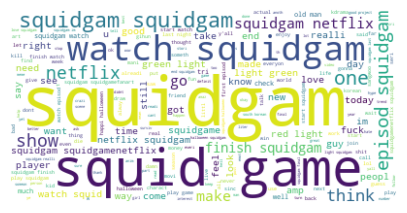

In [8]:
#WordCloud for text column in dataset
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
worldcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.figure(figsize=(5, 5))
plt.imshow(worldcloud, interpolation ='bilinear')
plt.axis("off")
plt.show()

In [9]:
#Sentiment Analysis
nltk.download('vader_lexicon')
sentiments =  SentimentIntensityAnalyzer()
data.loc[:, 'Positive'] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data.loc[:, 'Negative'] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data.loc[:, 'Neutral'] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text  Positive  Negative  \
0  life hit time poverti strike yougong yoo  let ...     0.173     0.108   
2                                      squidgam time     0.000     0.000   
3  blood  slideim join squidgam thing im alreadi ...     0.142     0.277   
4  two first game player kill mask guy  bloodi ni...     0.000     0.461   
5  thggo explod  marketcap soonth world first mob...     0.000     0.000   

   Neutral  
0    0.719  
2    1.000  
3    0.581  
4    0.539  
5    1.000  


In [10]:
#Showing the result of Sentiment Analysis
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])
def sentiment_score_result(a,b,c):
    if a > b and a > c:
        print("Postive😊")
    elif b > a and b > c:
        print("Negative😠")
    if c > a and c > b:
        print("Neutral🙂")
sentiment_score_result(x,y,z)

Neutral🙂


In [11]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  9651.042999999794
Negative:  4835.855000000021
Neutral:  60311.098000002414
